<h1><b>Task 1 - Prepare a Large SQL Dataset</h1>
<h3>Import mysql & configure

In [1]:
import mysql.connector

# Connect to MySQL server
connection = mysql.connector.connect(
host="localhost",
user="root",
password="", 

)

cursor = connection.cursor()

InterfaceError: 2003: Can't connect to MySQL server on 'localhost:3306' (Errno 10061: No connection could be made because the target machine actively refused it)

<h3>Create titanicDB</h3>

In [ ]:
cursor.execute("CREATE DATABASE IF NOT EXISTS titanicDB;")

<h3>Split titanicDB into Multiple Tables</h3>
Using titanicDB, create the following Tables...

In [ ]:
cursor.execute("USE titanicDB;")


<h5>Create passengers Table</h5>
PassengerId [PK] <br>
Name <br>
Sex <br>
Age <br>
SibSp <br>
Parch <br>

In [ ]:

cursor.execute(
    """
    CREATE TABLE IF NOT EXISTS passengers(
    PassengerId INT PRIMARY KEY,
    Name TEXT,
    Sex VARCHAR(10),
    Age INT,
    SibSp INT,
    Parch INT
    );           
""")
#cursor.execute("DROP TABLE IF EXISTS passengers;")     # For Debugging

<h5>Create tickets Table</h5>
Ticket [PK] <br>
PassengerId [FK] <br>
Pclass <br>
Fare <br>
Cabin <br>
Embarked <br>

In [ ]:
cursor.execute(
    """
    CREATE TABLE IF NOT EXISTS tickets (
    Ticket VARCHAR(25),
    PassengerId INT,  
    Pclass INT,
    Fare FLOAT,
    Cabin VARCHAR(20),
    Embarked VARCHAR(3),
    FOREIGN KEY (PassengerId) REFERENCES passengers(PassengerId),
    PRIMARY KEY (Ticket, PassengerId)
    );
""")
#cursor.execute("DROP TABLE IF EXISTS tickets;")    # For Debugging

<h5>Create survived Table</h5>
PassengerId [PK/FK] <br>
Survived <br>

JOIN query will be used later


In [ ]:
cursor.execute(
    """
    CREATE TABLE IF NOT EXISTS survived(
    PassengerId INT PRIMARY KEY,
    Survived BOOL,
    FOREIGN KEY (PassengerId) REFERENCES passengers(PassengerId)
    );
""")
#cursor.execute("DROP TABLE IF EXISTS survived;")   # For Debugging

<h3> Populating Tables:

In [ ]:
cursor.execute("DELETE FROM passengers;")   # Clear pre-existing records    (debugging)
cursor.execute(
    """
    INSERT INTO passengers (PassengerId, Name, Sex, Age, SibSp, Parch) VALUES
    (1, 'Braund, Mr. Owen Harris', 'male', 22, 1, 0),
    (2, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', 38, 1, 0),
    (3, 'Heikkinen, Miss. Laina', 'female', 26, 0, 0),
    (4, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35, 1, 0),
    (5, 'Allen, Mr. William Henry', 'male', 35, 0, 0),
    (6, 'Moran, Mr. James', 'male', NULL, 0, 0),
    (7, 'McCarthy, Mr. Timothy J', 'male', 54, 0, 0),
    (8, 'Palsson, Master. Gosta Leonard', 'male', 2, 3, 1),
    (9, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', 27, 0, 2),
    (10, 'Nasser, Mrs. Nicholas (Adele Achem)', 'female', 14, 1, 0),
    (11, 'Sandstrom, Miss. Marguerite Rut', 'female', 4, 1, 1),
    (12, 'Bonnell, Miss. Elizabeth', 'female', 58, 0, 0),
    (13, 'Saundercock, Mr. William Henry', 'male', 20, 0, 0),
    (14, 'Andersson, Mr. Anders Johan', 'male', 39, 1, 5),
    (15, 'Vestrom, Miss. Hulda Amanda Adolfina', 'female', 14, 0, 0),
    (16, 'Hewlett, Mrs. (Mary D Kingcome)', 'female', 55, 0, 0),
    (17, 'Rice, Master. Eugene', 'male', 2, 4, 1),
    (18, 'Williams, Mr. Charles Eugene', 'male', NULL, 0, 0),
    (19, 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)', 'female', 31, 1, 0),
    (20, 'Masselmani, Mrs. Fatima', 'female', NULL, 0, 0),
    (21, 'Fynney, Mr. Joseph J', 'male', 35, 0, 0),
    (22, 'Beesley, Mr. Lawrence', 'male', 34, 0, 0),
    (23, 'McGowan, Miss. Anna "Annie"', 'female', 15, 0, 0),
    (24, 'Sloper, Mr. William Thompson', 'male', 28, 0, 0),
    (25, 'Palsson, Miss. Torborg Danira', 'female', 8, 3, 1),
    (26, 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)', 'female', 38, 1, 5),
    (27, 'Emir, Mr. Farred Chehab', 'male', NULL, 0, 0),
    (28, 'Fortune, Mr. Charles Alexander', 'male', 19, 3, 2),
    (29, 'O Dwyer, Miss. Ellen "Nellie"', 'female', NULL, 0, 0),
    (30, 'Todoroff, Mr. Lalio', 'male', NULL, 0, 0),
    (31, 'Uruchurtu, Don. Manuel E', 'male', 40, 0, 0),
    (32, 'Spencer, Mrs. William Augustus (Marie Eugenie)', 'female', NULL, 1, 0),
    (33, 'Glynn, Miss. Mary Agatha', 'female', NULL, 0, 0),
    (34, 'Wheadon, Mr. Edward H', 'male', 66, 0, 0),
    (35, 'Meyer, Mr. Edgar Joseph', 'male', 28, 1, 0),
    (36, 'Holverson, Mr. Alexander Oskar', 'male', 42, 1, 0),
    (37, 'Mamee, Mr. Hanna', 'male', NULL, 0, 0),
    (38, 'Cann, Mr. Ernest Charles', 'male', 21, 0, 0),
    (39, 'Vander Planke, Miss. Augusta Maria', 'female', 18, 2, 0),
    (40, 'Nicola-Yarred, Miss. Jamila', 'female', 14, 1, 0),
    (41, 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)', 'female', 40, 1, 0),
    (42, 'Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)', 'female', 27, 1, 0),
    (43, 'Kraeff, Mr. Theodor', 'male', NULL, 0, 0),
    (44, 'Laroche, Miss. Simonne Marie Anne Andree', 'female', 3, 1, 2),
    (45, 'Devaney, Miss. Margaret Delia', 'female', 19, 0, 0),
    (46, 'Rogers, Mr. William John', 'male', NULL, 0, 0),
    (47, 'Lennon, Mr. Denis', 'male', NULL, 1, 0),
    (48, 'O Driscoll, Miss. Bridget', 'female', NULL, 0, 0),
    (49, 'Samaan, Mr. Youssef', 'male', NULL, 2, 0),
    (50, 'Slocum, Mrs. Martin (Charlotte Edith)', 'female', NULL, 0, 0);
""")

print ("Data inserted.")    # Confirmation

Data inserted.


In [ ]:
cursor.execute("DELETE FROM tickets;")  # Clear pre-existing records    (debugging)
cursor.execute(
    """
    INSERT INTO tickets (Ticket, PassengerId, Pclass, Fare, Cabin, Embarked) VALUES
    ('A/5 21171', 1, 3, 7.25, NULL, 'S'),
    ('PC 17599', 2, 1, 71.2833, 'C85', 'C'),
    ('STON/O2. 3101282', 3, 3, 7.925, NULL, 'S'),
    ('113803', 4, 1, 53.1, 'C123', 'S'),
    ('373450', 5, 3, 8.05, NULL, 'S'),
    ('330877', 6, 3, 8.4583, NULL, 'Q'),
    ('17463', 7, 1, 51.8625, 'E46', 'S'),
    ('349909', 8, 3, 21.075, NULL, 'S'),
    ('347742', 9, 3, 11.1333, NULL, 'S'),
    ('237736', 10, 2, 30.0708, NULL, 'C'),
    ('PP 9549', 11, 3, 16.7, 'G6', 'S'),
    ('113783', 12, 1, 26.55, 'C103', 'S'),
    ('A/5. 2151', 13, 3, 8.05, NULL, 'S'),
    ('347082', 14, 3, 31.275, NULL, 'S'),
    ('350406', 15, 3, 7.8542, NULL, 'S'),
    ('248706', 16, 2, 16.0, NULL, 'S'),
    ('382652', 17, 3, 29.125, NULL, 'Q'),
    ('244373', 18, 2, 13.0, NULL, 'S'),
    ('345763', 19, 3, 18.0, NULL, 'S'),
    ('2649', 20, 3, 7.225, NULL, 'C'),
    ('239865', 21, 2, 26.0, NULL, 'S'),
    ('248698', 22, 2, 13.0, 'D56', 'S'),
    ('330923', 23, 3, 8.0292, NULL, 'Q'),
    ('113788', 24, 1, 35.5, 'A6', 'S'),
    ('349909', 25, 3, 21.075, NULL, 'S'),
    ('347077', 26, 3, 31.3875, NULL, 'S'),
    ('2631', 27, 3, 7.225, NULL, 'C'),
    ('19950', 28, 1, 263.0, 'C23 C25 C27', 'S'),
    ('330959', 29, 3, 7.8792, NULL, 'Q'),
    ('349216', 30, 3, 7.8958, NULL, 'S'),
    ('PC 17601', 31, 1, 27.7208, NULL, 'C'),
    ('PC 17569', 32, 1, 146.5208, 'B78', 'C'),
    ('335677', 33, 3, 7.75, NULL, 'Q'),
    ('C.A. 24579', 34, 2, 10.5, NULL, 'S'),
    ('2680', 35, 2, 82.1708, NULL, 'C'),
    ('PC 17603', 36, 1, 52.0, NULL, 'S'),
    ('16550', 37, 3, 7.2292, NULL, 'C'),
    ('A./5. 2152', 38, 3, 8.05, NULL, 'S'),
    ('345764', 39, 3, 18.0, NULL, 'S'),
    ('2651', 40, 3, 11.2417, NULL, 'C'),
    ('7546', 41, 3, 9.475, NULL, 'S'),
    ('11668', 42, 2, 21.0, NULL, 'S'),
    ('349253', 43, 3, 7.8958, NULL, 'C'),
    ('2623', 44, 3, 41.5792, NULL, 'C'),
    ('370365', 45, 3, 7.8792, NULL, 'Q'),
    ('113798', 46, 1, 61.9792, 'B30', 'S'),
    ('17608', 47, 3, 7.8792, NULL, 'Q'),
    ('364856', 48, 3, 7.75, NULL, 'Q'),
    ('2662', 49, 3, 21.6792, NULL, 'C'),
    ('SC/Paris 2123', 50, 3, 30.5, NULL, 'S');
""")

print ("Data inserted.")    # Confirmation

Data inserted.


In [ ]:
cursor.execute("DELETE FROM survived;") # Clear pre-existing records    (debugging)
cursor.execute(
"""
    INSERT INTO survived (PassengerId, Survived) VALUES
    (1, 0),
    (2, 1),
    (3, 1),
    (4, 1),
    (5, 0),
    (6, 0),
    (7, 0),
    (8, 0),
    (9, 1),
    (10, 1),
    (11, 1),
    (12, 1),
    (13, 0),
    (14, 0),
    (15, 0),
    (16, 1),
    (17, 0),
    (18, 1),
    (19, 0),
    (20, 1),
    (21, 0),
    (22, 1),
    (23, 1),
    (24, 1),
    (25, 0),
    (26, 1),
    (27, 0),
    (28, 0),
    (29, 1),
    (30, 0),
    (31, 0),
    (32, 1),
    (33, 1),
    (34, 0),
    (35, 0),
    (36, 0),
    (37, 1),
    (38, 0),
    (39, 0),
    (40, 1),
    (41, 0),
    (42, 0),
    (43, 0),
    (44, 1),
    (45, 1),
    (46, 0),
    (47, 0),
    (48, 1),
    (49, 0),
    (50, 0);
"""
)

print ("Data inserted.")    # Confirmation

Data inserted.


<h3>Basic Query</h3>
SELECT query

In [ ]:
import pandas as pd
query = """
SELECT Name, Age, Sex 
FROM passengers 
WHERE Age < 18
;"""

basic_df = pd.read_sql(query, connection) # Use Pandas to read and store output

basic_df.head() # Confirmation

C:\Users\n6hod\AppData\Local\Temp\ipykernel_15524\3208467270.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  basic_df = pd.read_sql(query, connection) # Use Pandas to read and store output


,Name,Age,Sex
0,"Palsson, Master. Gosta Leonard",2,male
1,"Nasser, Mrs. Nicholas (Adele Achem)",14,female
2,"Sandstrom, Miss. Marguerite Rut",4,female
3,"Vestrom, Miss. Hulda Amanda Adolfina",14,female
4,"Rice, Master. Eugene",2,male


<h3>Aggregation Query</h3>
Work out the average fare paid for each class

In [ ]:
query = """
SELECT Pclass, AVG(fare) as avg_fare 
FROM tickets 
GROUP BY Pclass
;"""

aggregation_df = pd.read_sql(query, connection) # Use Pandas to read and store output

aggregation_df.head()   # Confirmation

C:\Users\n6hod\AppData\Local\Temp\ipykernel_15524\2522145617.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aggregation_df = pd.read_sql(query, connection) # Use Pandas to read and store output


,Pclass,avg_fare
0,1,78.951660
1,2,26.467700
2,3,14.141281


<h3>Join Query</h3>
Joining the passengers and tickets tables to survived.

In [ ]:
query = """
SELECT p.Name, p.Sex, p.Age, t.Fare, t.Pclass, s.Survived 
FROM passengers p 
JOIN tickets t ON p.PassengerId = t.PassengerId 
JOIN survived s 
ON p.PassengerId = s.PassengerId
;"""

join_df = pd.read_sql(query, connection)    # Use Pandas to read and store output

join_df.head(10)    # Confirmation

C:\Users\n6hod\AppData\Local\Temp\ipykernel_15524\3118788074.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  join_df = pd.read_sql(query, connection)    # Use Pandas to read and store output


,Name,Sex,Age,Fare,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22.0,7.2500,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26.0,7.9250,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,1
4,"Allen, Mr. William Henry",male,35.0,8.0500,3,0
5,"Moran, Mr. James",male,NaN,8.4583,3,0
6,"McCarthy, Mr. Timothy J",male,54.0,51.8625,1,0
7,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,3,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,3,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,2,1


<h3>Filtering / Sorting</h3>


In [ ]:
query = """
SELECT p.Name, p.Age, t.Embarked 
FROM passengers p 
JOIN tickets t ON p.PassengerId = t.PassengerId 
WHERE t.Embarked = 'S' 
ORDER BY age DESC
;"""

filter_df = pd.read_sql(query, connection)  # Use Pandas to read and store output

filter_df.head()    # Confirmation

C:\Users\n6hod\AppData\Local\Temp\ipykernel_15524\2440222284.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  filter_df = pd.read_sql(query, connection)


,Name,Age,Embarked
0,"Wheadon, Mr. Edward H",66.0,S
1,"Bonnell, Miss. Elizabeth",58.0,S
2,"Hewlett, Mrs. (Mary D Kingcome)",55.0,S
3,"McCarthy, Mr. Timothy J",54.0,S
4,"Holverson, Mr. Alexander Oskar",42.0,S


<h3>Sub Query</h3>
Join passengers and tickets tables to survived <br>
Select passengers who did not survive, and under 18

In [ ]:
query = """
SELECT p.Name, p.Sex, p.Age, t.Fare, t.Pclass, s.Survived 
FROM passengers p 
JOIN tickets t on p.PassengerId = t.PassengerId 
JOIN survived s ON p.PassengerId = s.PassengerId 
WHERE p.PassengerId IN (
    SELECT passengerId 
    FROM survived 
    WHERE Survived = 0 AND p.Age < 18
    )
;"""

sub_df = pd.read_sql(query, connection) # Use Pandas to read and store output

sub_df.head()   # Confirmation

C:\Users\n6hod\AppData\Local\Temp\ipykernel_15524\2651299521.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sub_df = pd.read_sql(query, connection)


,Name,Sex,Age,Fare,Pclass,Survived
0,"Palsson, Master. Gosta Leonard",male,2,21.0750,3,0
1,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,7.8542,3,0
2,"Rice, Master. Eugene",male,2,29.1250,3,0
3,"Palsson, Miss. Torborg Danira",female,8,21.0750,3,0


<h2><b>Task 2 - Data processing & Machine Learning</b></h2>
Load the three tables into Pandas

In [ ]:
passengers_df = pd.read_sql(
    """
    SELECT *
    FROM passengers             
    ;""", 
    connection
)
tickets_df = pd.read_sql(
    """
    SELECT *
    FROM tickets
    ;""",
    connection
)
survived_df = pd.read_sql(
    """
    SELECT *
    FROM survived
    ;""",
    connection
)

passengers_df.head()  # Confirmation

C:\Users\n6hod\AppData\Local\Temp\ipykernel_15524\620178017.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  passengers_df = pd.read_sql(
C:\Users\n6hod\AppData\Local\Temp\ipykernel_15524\620178017.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tickets_df = pd.read_sql(
C:\Users\n6hod\AppData\Local\Temp\ipykernel_15524\620178017.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  survived_df = pd.read_sql(


,PassengerId,Name,Sex,Age,SibSp,Parch
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,"Allen, Mr. William Henry",male,35.0,0,0


<h3>Merging tables into a singular dataset

In [ ]:
full_df = pd.merge(passengers_df, tickets_df, on="PassengerId")
full_df = pd.merge(full_df, survived_df, on="PassengerId")


<h3>Performing Descriptive statistics

In [ ]:
full_df.head()  # First specified quantity of records (Default 5)

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Pclass,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,3,7.2500,None,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,3,7.9250,None,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,3,8.0500,None,S,0


In [ ]:
full_df.info()  # Provide overview on the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  50 non-null     int64  
 1   Name         50 non-null     object 
 2   Sex          50 non-null     object 
 3   Age          35 non-null     float64
 4   SibSp        50 non-null     int64  
 5   Parch        50 non-null     int64  
 6   Ticket       50 non-null     object 
 7   Pclass       50 non-null     int64  
 8   Fare         50 non-null     float64
 9   Cabin        10 non-null     object 
 10  Embarked     50 non-null     object 
 11  Survived     50 non-null     int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.8+ KB


In [ ]:
full_df.describe()  # Statistical summary of the table contents

,PassengerId,Age,SibSp,Parch,Pclass,Fare,Survived
count,50.00000,35.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,27.742857,0.660000,0.400000,2.440000,29.075588,0.440000
std,14.57738,16.152477,0.960655,1.087968,0.812153,42.114092,0.501427
min,1.00000,2.000000,0.000000,0.000000,1.000000,7.225000,0.000000
25%,13.25000,16.500000,0.000000,0.000000,2.000000,7.951050,0.000000
50%,25.50000,27.000000,0.000000,0.000000,3.000000,16.350000,0.000000
75%,37.75000,38.000000,1.000000,0.000000,3.000000,30.392700,1.000000
max,50.00000,66.000000,4.000000,5.000000,3.000000,263.000000,1.000000


In [ ]:
full_df.isnull().sum()  # Output quantity of null values in each attribute

PassengerId     0
Name            0
Sex             0
Age            15
SibSp           0
Parch           0
Ticket          0
Pclass          0
Fare            0
Cabin          40
Embarked        0
Survived        0
dtype: int64

<h3>Handling anomalies</h3>
Null values, Duplicate records, Outliers

In [ ]:
before = full_df['Age'].isnull().sum()  # Checks for Null values in Age
full_df['Age'].fillna(full_df['Age'].median(), inplace=True)    # Sets Null Age to median value
after = full_df['Age'].isnull().sum()   # Checks for Null values in Age

print("Before:", before, "After:", after)

Before: 15 After: 0


C:\Users\n6hod\AppData\Local\Temp\ipykernel_15524\87665490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['Age'].fillna(full_df['Age'].median(), inplace=True)    # Sets Null Age to median value


In [ ]:
before = full_df.duplicated().sum()   # Checks for duplicate records
full_df.drop_duplicates(inplace=True)   # Drop any duplicate record
after = full_df.duplicated().sum()  # Checks for duplicate records

print ("Before:", before, "After:", after)

Before: 0 After: 0


<h3>Visualisation</h3>
Import Matplot & Seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

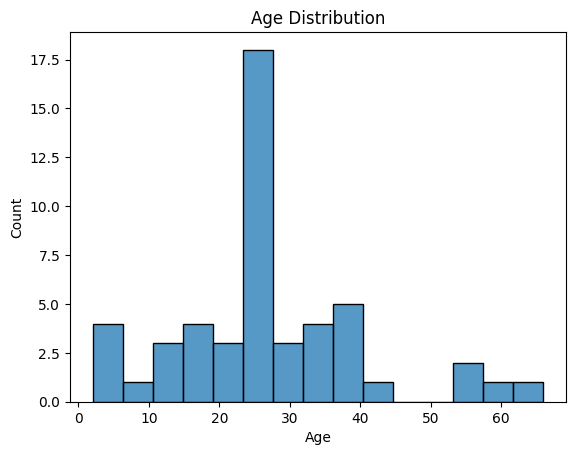

In [ ]:
sns.histplot(full_df['Age'], bins=15)   # divides the age range into 15 equally spaced bars
plt.title("Age Distribution")
plt.show()

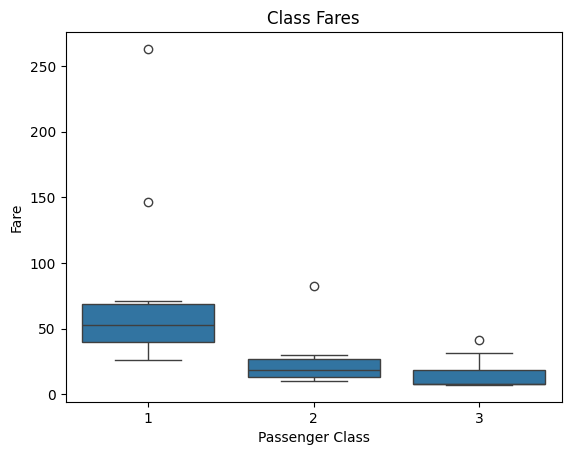

In [ ]:
sns.boxplot(x = 'Pclass', y='Fare', data=full_df)
plt.title("Class Fares")
plt.xlabel('Passenger Class')
plt.show()

<h5>Distribution of Pclass Survival rate</h5>
Class did have an impact on survival rate

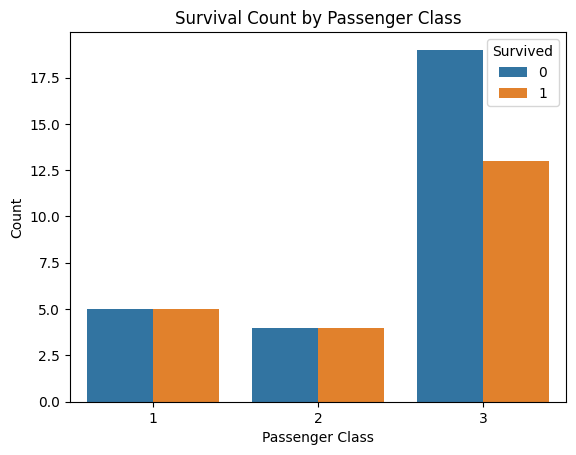

In [ ]:
sns.countplot(data=full_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

<h4>Distribution and Comparison of Age and Sex Survival rates</h4>
Age and Sex does have an impact on Survival rate

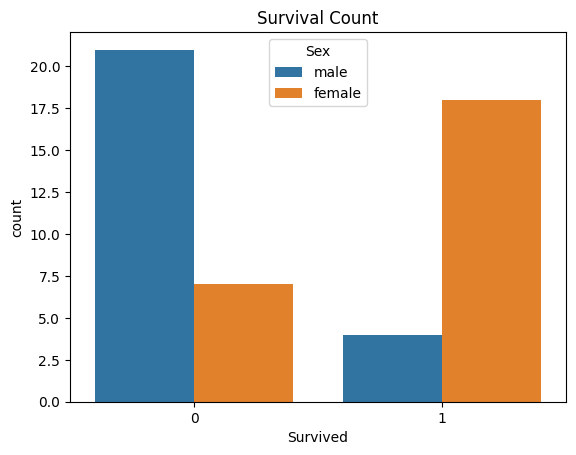

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=full_df)
plt.title('Survival Count')
plt.show()

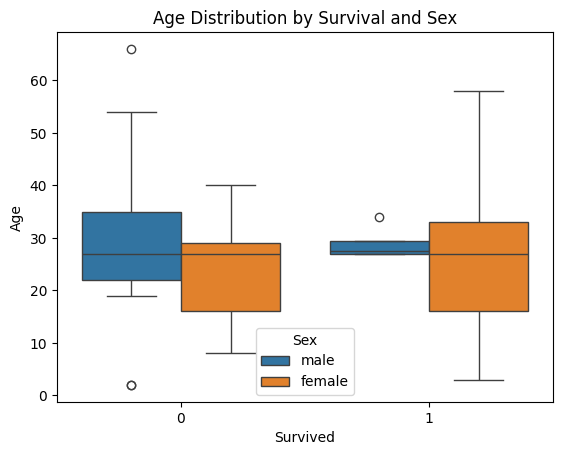

In [ ]:
sns.boxplot(x='Survived', y='Age', hue='Sex', data=full_df)
plt.title('Age Distribution by Survival and Sex')
plt.legend(title='Sex')
plt.show()

<h3>Applying Machine Learning</h3>
Import Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Select Features
features = ['Age', 'Fare', 'Pclass', 'Sex']
df_ml = full_df[features + ['Survived']].dropna()   # Sets df_ml to attributes in full_df (Age, Fare, Pclass, Sex, Survived) & Ignores null values

# Make Sex binary
df_ml['Sex'] = df_ml['Sex'].map({'male': 0, 'female': 1})

<h4>Split the Data</h4>
Randomly splits data into train / test <br>
test_size = ratio between train / test split (0.2 = 20% data used to test) <br>
random_state = 42 fixes the seed (ensures same split every time)

In [ ]:
X = df_ml[features] # Age, Fare, Pclass, Sex
y = df_ml['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<h4>Accuracy</h4>
Percentage of predictions on the tests that were correct.

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7


<h4>Confusion Matrix</h4>
Shows where the model fails by detailing correct / incorrect classifications <br>
<br>______Pred No , Pred Yes
<br>Act No  [T.neg  ,   F.pos]
<br>Act Yes [F.neg  ,   T.pos]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[4 1]
 [2 3]]


<h4>Classification Report</h4>
Shows the overall accuracy, where the errors are made, and performance on each class<br>
Precision - How many pred pos are correct   <br>
Recall - How many act pos are correct   <br>
F1-Score - Balance between Precision and Recall (Harmonic Mean) <br>
Support - Number of Instances of each class in the test

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10

